# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [6]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

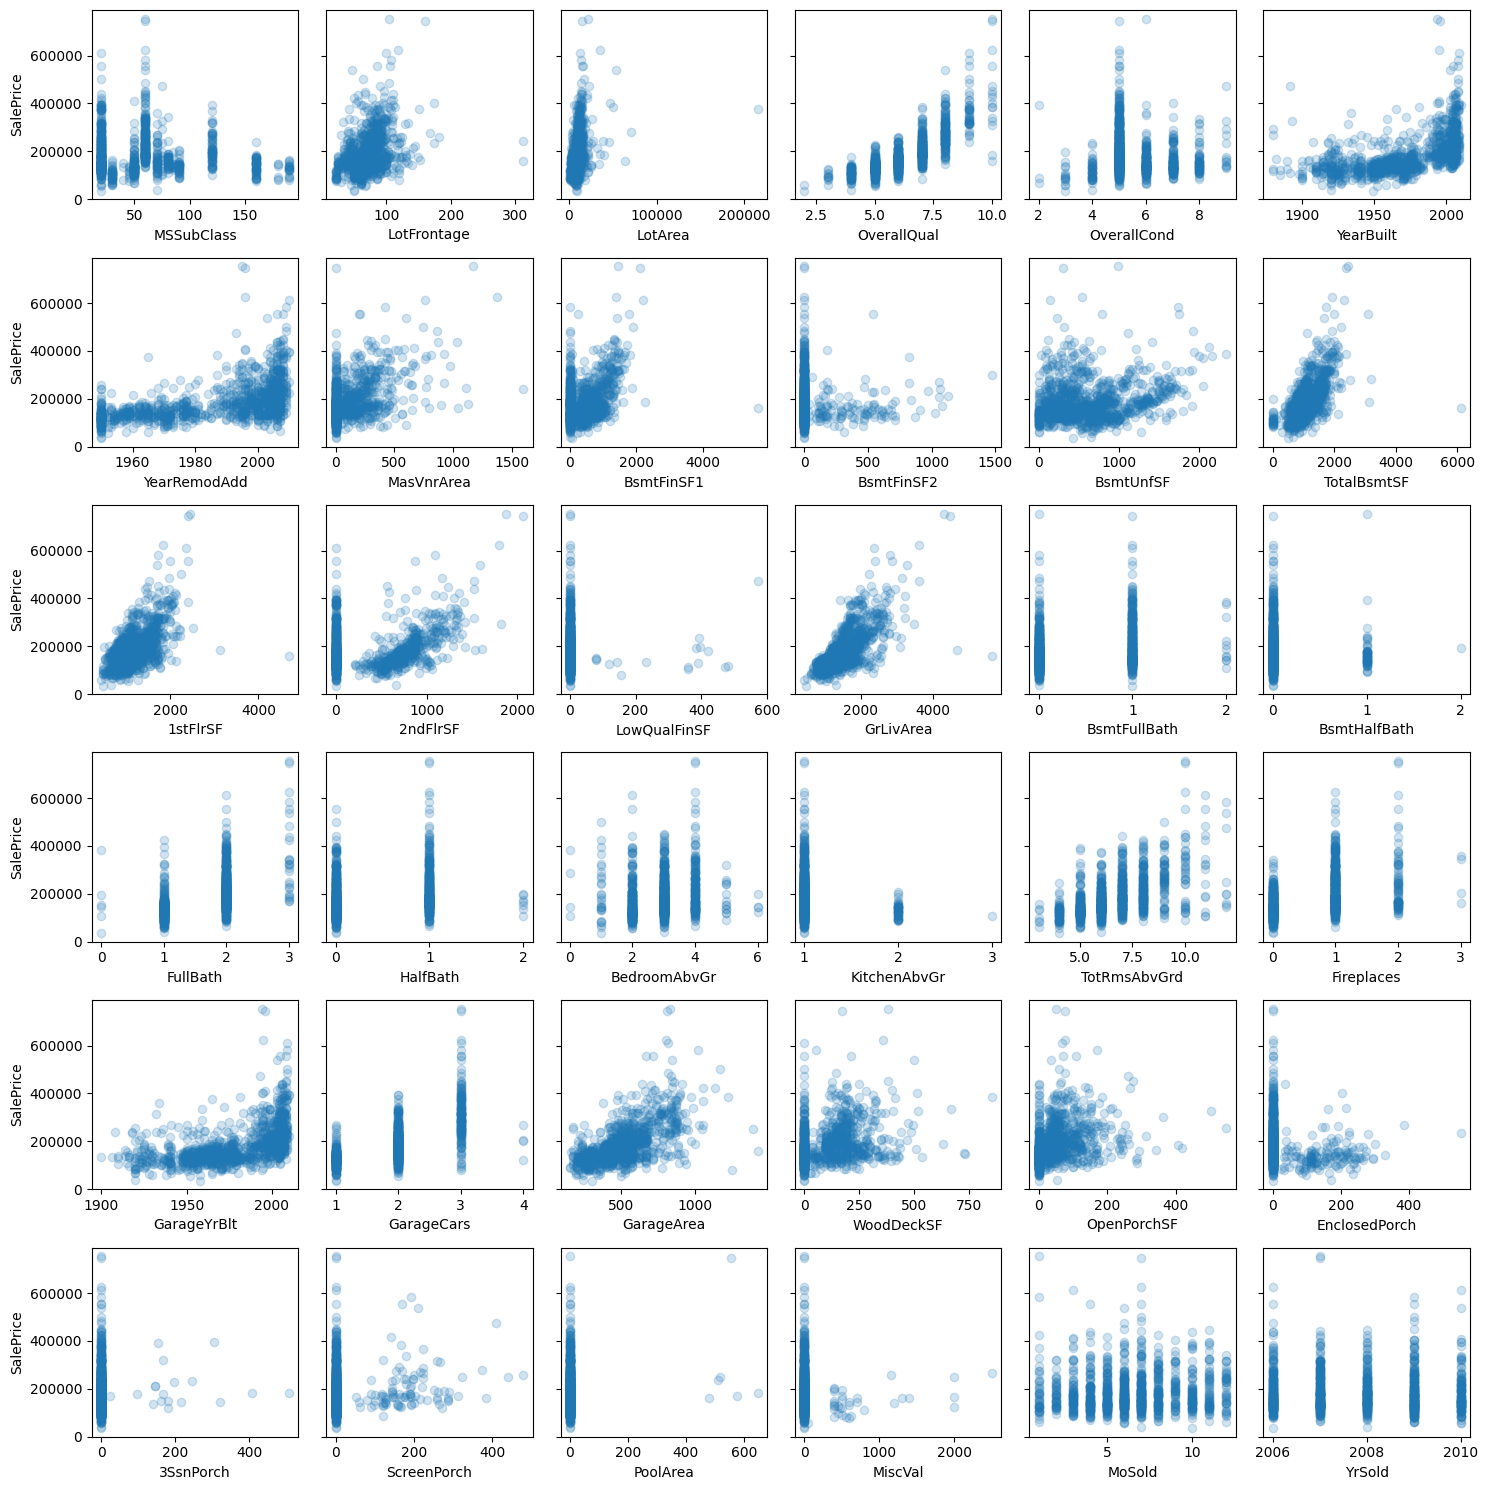

In [7]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

# Your written answer here

Exponential Relationship -Sharp curve upward — log-transforming the feature will help linearize it. This can be  seen in OverallCond or GarageArea 


Linear Relationship - A nice linear trend, perfect for linear regression — this is evidenced in GrLivArea 

Logarithmic Spread -This shape shows a rapid rise at the beginning that levels off. LotArea can exhibit this characteristics






### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

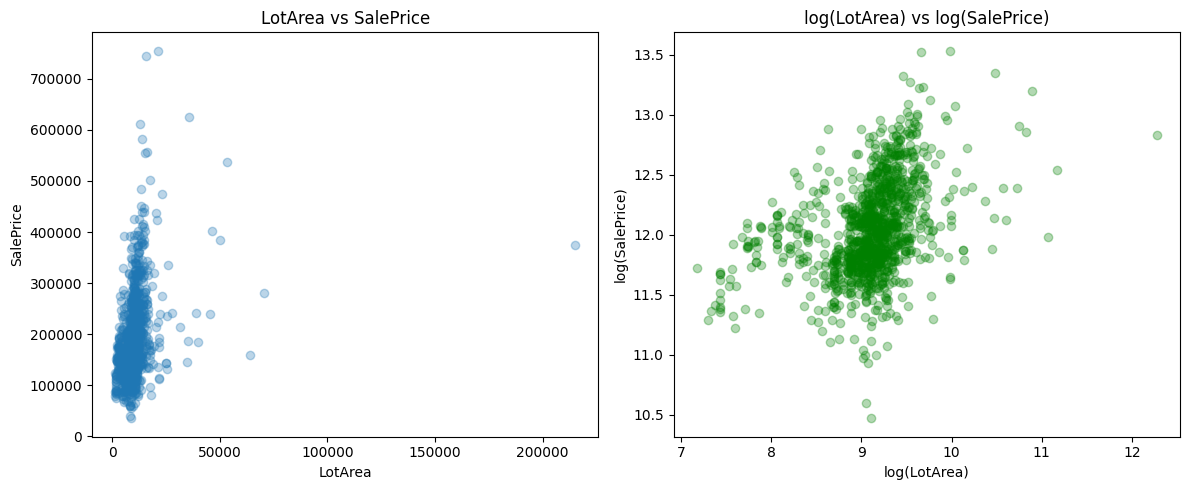

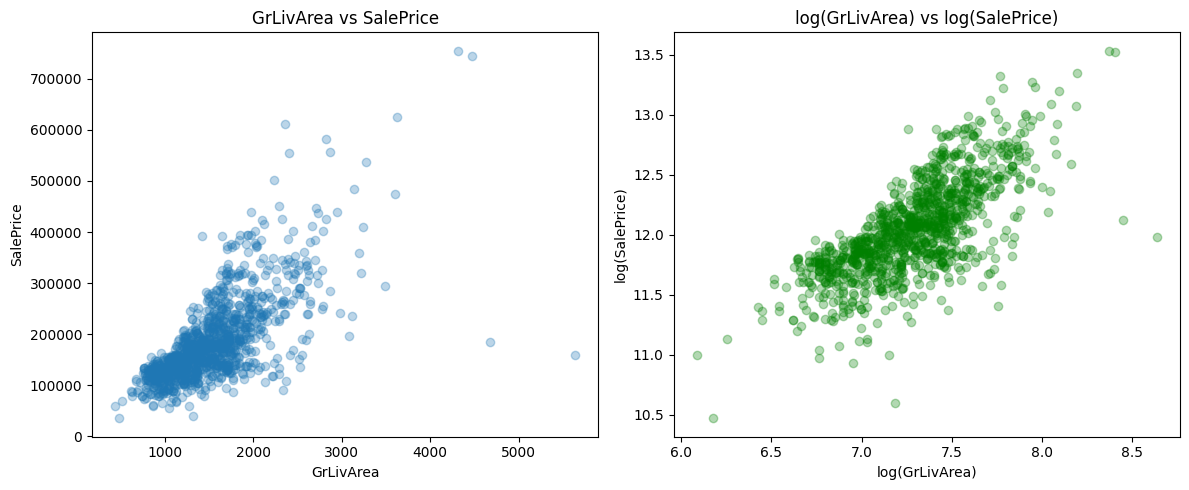

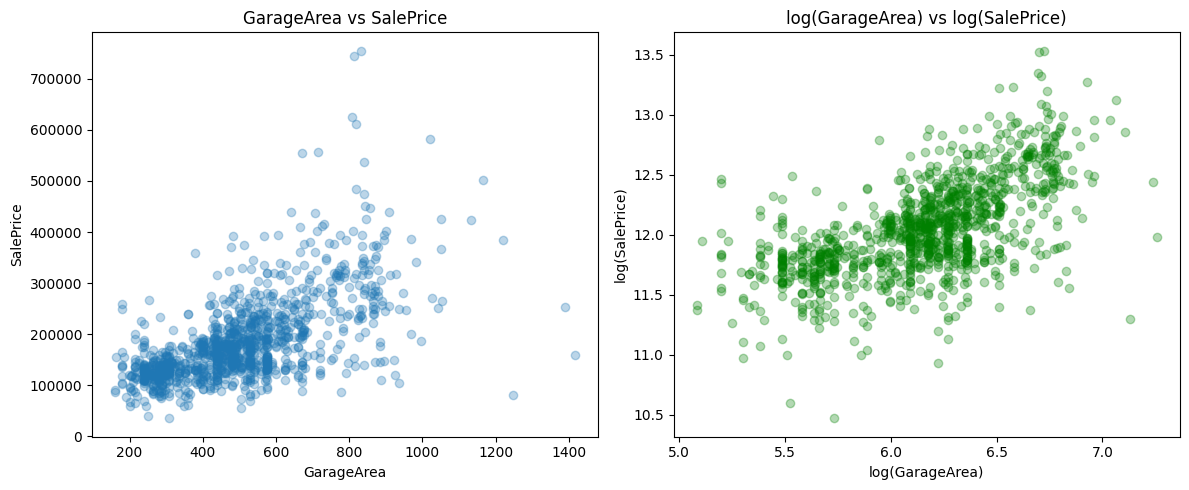

In [19]:
# Your code here


import numpy as np
import matplotlib.pyplot as plt

# Load the data
#ames = pd.read_csv("ames.csv", index_col=0)
#ames = ames.select_dtypes("number")
#ames.dropna(inplace=True)

# Define the target variable
y = ames["SalePrice"]

log_y = np.log1p(y)  # log-transformed SalePrice

# Features to analyze
log_features = ["LotArea", "GrLivArea", "GarageArea"]

# Plot original and log-transformed features
for feature in log_features:
    X = ames[feature]
    log_X = np.log1p(X)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original plot
    axes[0].scatter(X, y, alpha=0.3)
    axes[0].set_title(f"{feature} vs SalePrice")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("SalePrice")

    # Log-log plot
    axes[1].scatter(log_X, log_y, alpha=0.3, color='green')
    axes[1].set_title(f"log({feature}) vs log(SalePrice)")
    axes[1].set_xlabel(f"log({feature})")
    axes[1].set_ylabel("log(SalePrice)")

    plt.tight_layout()
    plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [20]:
# Your code here - prepare data for modeling

features = ["LotArea", "GrLivArea", "GarageArea"]
# Log-transform the features
X = np.log1p(ames[features])

# Log-transform the target variable
y = np.log1p(ames["SalePrice"])


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [23]:
# Your code here - build a model

import statsmodels.api as sm

X_const = sm.add_constant(X)

# Build the OLS model
model = sm.OLS(y, X_const)

# Fit the model
results = model.fit()

# Display the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     643.7
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          6.66e-243
Time:                        15:59:08   Log-Likelihood:                 8.8001
No. Observations:                1121   AIC:                            -9.600
Df Residuals:                    1117   BIC:                             10.49
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4807      0.183     24.541      0.0

### Model Evaluation and Interpretation

How did the model perform? How might we interpret its coefficients? Create as many cells as needed.

*How did the model perform*

The model achieved an **R-squared of 0.634**, meaning it explains about **63.4%** of the variability in SalePrice after applying a log-log transformation.

- This is a reasonably strong result for housing data, where many unmeasured factors e.g neighborhood appeal, street views etc can also affect price.
- The **F-statistic** was very high and statistically significant (p < 0.001), indicating that the overall model is meaningful.
- All three features- LotArea, GrLivArea, GarageArea, were statistically significant predictors (p < 0.001).


*How might we interpret the coefficients*

Since we used a log-log model, the coefficients can be interpreted as **elasticities**:

- GrLivArea (coefficient = 0.6466): means a 1% increase in the above-ground living area is associated with about a 0.65% increase in SalePrice, on average.
- GarageArea (coefficient = 0.3501):means a 1% increase in garage area is associated with a 0.35% increase in SalePrice, on average.
- LotArea (coefficient = 0.0776):means a 1% increase in lot size is associated with only a 0.078% increase in SalePrice, on average.

Thus, GrLivArea has the strongest relationship with SalePrice, followed by GarageArea, while LotArea has a smaller but still positive impact.

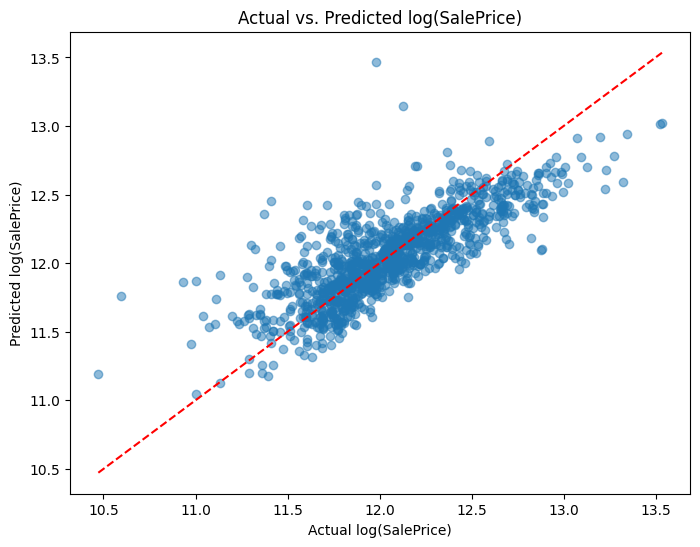

In [24]:
# Your code here - evaluate the model

# Predict on training data
y_pred = results.predict(X_const)

# Scatter plot of actual vs. predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual log(SalePrice)')
plt.ylabel('Predicted log(SalePrice)')
plt.title('Actual vs. Predicted log(SalePrice)')
plt.show()

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.